In [20]:
import csv
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn import metrics
import tensorflow as tf
print(tf.__version__)

2.12.0


In [21]:
random_seed = 42
n_time_steps = 5 #taking 3 seconds
n_features = 132
step = 2#taking 1.5 seconds
n_classes = 2
n_epochs = 10
batch_size = 32
learning_rate = 0.00015
l2_loss = 0.0015

In [22]:
import pandas as pd
import os

# Specify the folder where your CSV files are located
folder_path ="C:\\aryaaa\\arya's model(2)\\yoga poses csv"

# Specify the names of the CSV files you want to access
file_names_to_access = ["cobra_normal.csv", "cobra pose.csv"]

# Initialize an empty list to hold individual DataFrames
data_frames = []

# Loop through the specified file names and read and append their data to the data_frames list
for file_name in file_names_to_access:
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_csv(file_path)
    data_frames.append(data)

# Combine the individual DataFrames into one DataFrame
df = pd.concat(data_frames).reset_index(drop=True)

# Check the shape of the combined_data DataFrame
print(df.shape)


(41019, 133)


In [23]:
df.head()

,pose_folder,0_x,0_y,0_z,0_vis,1_x,1_y,1_z,1_vis,2_x,...,30_z,30_vis,31_x,31_y,31_z,31_vis,32_x,32_y,32_z,32_vis
0,cobra_normal,-0.599224,0.153585,-0.410920,0.999198,-0.602401,0.111502,-0.428201,0.999525,-0.603005,...,0.733269,0.027992,0.319080,-0.058164,0.550925,0.120188,0.297650,-0.009821,0.737569,0.040587
1,cobra_normal,-0.590104,0.160989,-0.413553,0.999273,-0.593917,0.122380,-0.433026,0.999569,-0.594538,...,0.770816,0.028459,0.063392,-0.045438,0.588594,0.128600,0.027889,0.029062,0.786259,0.042345
2,cobra_normal,-0.591640,0.162934,-0.393732,0.999323,-0.598547,0.127005,-0.413399,0.999599,-0.599040,...,0.704436,0.031104,0.155525,-0.053920,0.583572,0.130001,0.074253,-0.013027,0.715570,0.045154
3,cobra_normal,-0.591770,0.162872,-0.380179,0.999330,-0.599258,0.128509,-0.399884,0.999596,-0.599708,...,0.591340,0.039949,0.160259,-0.054717,0.556190,0.125431,0.349395,-0.074188,0.606498,0.051757
4,cobra_normal,-0.591756,0.164220,-0.380553,0.999358,-0.599323,0.130484,-0.400572,0.999609,-0.599781,...,0.608937,0.044865,0.185445,-0.059626,0.549783,0.120991,0.398593,-0.085744,0.621366,0.054442


In [24]:
df.tail()

,pose_folder,0_x,0_y,0_z,0_vis,1_x,1_y,1_z,1_vis,2_x,...,30_z,30_vis,31_x,31_y,31_z,31_vis,32_x,32_y,32_z,32_vis
41014,cobra_pose,0.291336,-0.614901,-0.056958,0.999887,0.237204,-0.618045,-0.037060,0.999667,0.237318,...,-0.089031,0.987530,-0.971889,0.077676,0.123358,0.637411,-0.908843,0.040207,-0.172375,0.976167
41015,cobra_pose,0.291127,-0.615067,-0.057871,0.999887,0.236984,-0.618092,-0.037938,0.999665,0.237098,...,-0.088996,0.987575,-0.971869,0.077828,0.123970,0.638589,-0.909183,0.040202,-0.172363,0.976302
41016,cobra_pose,0.290339,-0.615338,-0.058283,0.999886,0.236169,-0.618146,-0.038345,0.999663,0.236280,...,-0.088969,0.987650,-0.971972,0.077826,0.124714,0.640535,-0.909790,0.040217,-0.172356,0.976480
41017,cobra_pose,0.289708,-0.615673,-0.058438,0.999886,0.235529,-0.618236,-0.038505,0.999663,0.235639,...,-0.088924,0.987717,-0.972087,0.077785,0.125075,0.642549,-0.910232,0.040218,-0.172343,0.976653
41018,cobra_pose,0.288968,-0.616006,-0.058341,0.999887,0.234821,-0.618378,-0.038428,0.999664,0.234932,...,-0.088904,0.987753,-0.972244,0.077750,0.125139,0.643871,-0.910646,0.040224,-0.172344,0.976755


In [25]:
pip install -U imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [26]:
from imblearn.over_sampling import SMOTE

# Assuming df is your DataFrame and "category" is your target column
X = df.drop('pose_folder', axis=1)
y = df['pose_folder']

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Create a DataFrame with the rebalanced data
balanced_df = pd.concat([pd.DataFrame(y_sm, columns=['pose_folder']), pd.DataFrame(X_sm)], axis=1)
balanced_df

,pose_folder,0_x,0_y,0_z,0_vis,1_x,1_y,1_z,1_vis,2_x,...,30_z,30_vis,31_x,31_y,31_z,31_vis,32_x,32_y,32_z,32_vis
0,cobra_normal,-0.599224,0.153585,-0.410920,0.999198,-0.602401,0.111502,-0.428201,0.999525,-0.603005,...,0.733269,0.027992,0.319080,-0.058164,0.550925,0.120188,0.297650,-0.009821,0.737569,0.040587
1,cobra_normal,-0.590104,0.160989,-0.413553,0.999273,-0.593917,0.122380,-0.433026,0.999569,-0.594538,...,0.770816,0.028459,0.063392,-0.045438,0.588594,0.128600,0.027889,0.029062,0.786259,0.042345
2,cobra_normal,-0.591640,0.162934,-0.393732,0.999323,-0.598547,0.127005,-0.413399,0.999599,-0.599040,...,0.704436,0.031104,0.155525,-0.053920,0.583572,0.130001,0.074253,-0.013027,0.715570,0.045154
3,cobra_normal,-0.591770,0.162872,-0.380179,0.999330,-0.599258,0.128509,-0.399884,0.999596,-0.599708,...,0.591340,0.039949,0.160259,-0.054717,0.556190,0.125431,0.349395,-0.074188,0.606498,0.051757
4,cobra_normal,-0.591756,0.164220,-0.380553,0.999358,-0.599323,0.130484,-0.400572,0.999609,-0.599781,...,0.608937,0.044865,0.185445,-0.059626,0.549783,0.120991,0.398593,-0.085744,0.621366,0.054442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48571,cobra_pose,-0.579459,-0.434428,-0.032537,0.999763,-0.574237,-0.467009,-0.047992,0.999747,-0.574348,...,0.212188,0.739502,0.918753,0.151456,-0.128172,0.981494,0.944092,0.152834,0.155975,0.833525
48572,cobra_pose,-0.527660,-0.542978,-0.100736,0.998574,-0.494085,-0.563579,-0.109703,0.998921,-0.494481,...,0.263495,0.691465,0.965042,0.068424,-0.114947,0.963811,0.952982,0.072424,0.202486,0.730760
48573,cobra_pose,0.457499,-0.562980,-0.022502,0.999783,0.419964,-0.594509,-0.006077,0.999620,0.420345,...,-0.072180,0.978455,-0.930496,0.177908,0.125623,0.598272,-0.881318,0.095827,-0.163733,0.951967
48574,cobra_pose,0.376726,-0.500958,-0.167954,0.999998,0.380216,-0.537214,-0.140677,0.999995,0.380682,...,-0.107294,0.987617,-0.936269,0.157227,0.135750,0.576468,-0.919665,0.065491,-0.186032,0.970263


In [27]:
import numpy as np
import pandas as pd

# Initialize lists to store segments and labels
segments = []
labels = []

# Loop through the data with a specified step
for i in range(0, balanced_df.shape[0], step):
    mylist = []
    label = None  # Initialize label as None

    if i + n_time_steps < balanced_df.shape[0]:
        for j in range(i, i + n_time_steps):
            mylist.append(balanced_df.iloc[j, 1:133].values)  # Assuming you have 321 feature columns

        # Check the label for the segment
        if 'cobra_normal' in balanced_df['pose_folder'].iloc[i:i + n_time_steps].values:
            label = 0  # Set label to 1 if 'seizure' is present in this segment
        else:
            label = 1  # Set label to 0 if 'seizure' is not present

        segments.append(mylist)
        labels.append(label)

# Convert segments and labels to NumPy arrays
reshaped_segments = np.array(segments, dtype=np.float32)
labels_binary = np.array(labels, dtype=np.float32)


In [28]:
labels_binary

array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)

In [29]:
# Add attention layer to the deep learning network
class attention_layer(tf.keras.layers.Layer):
    def __init__(self,**kwargs):
        super().__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1),
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1),
                               initializer='zeros', trainable=True)
        super().build(input_shape)

    def call(self,x):
        # Alignment scores. Pass them through tanh function
        e = tf.keras.backend.tanh(tf.keras.backend.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = tf.keras.backend.squeeze(e, axis=-1)
        # Compute the weights
        alpha = tf.keras.backend.softmax(e)
        # Reshape to tensorFlow format
        alpha = tf.keras.backend.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = tf.keras.backend.sum(context, axis=1)
        return context

In [30]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels_binary, test_size=0.2, random_state=random_seed)

n_classes = 2

y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)

In [31]:
from kerastuner.tuners import Hyperband
# Define a hypermodel using a function
def build_hypermodel(hp):
    input_shape = (X_train.shape[1], X_train.shape[2])
    inputs = tf.keras.Input(shape=input_shape)
    x = tf.keras.layers.LSTM(units=hp.Int('lstm_units', min_value=64, max_value=256, step=32), return_sequences=True)(inputs)
    x = tf.keras.layers.LeakyReLU(alpha=0.5)(x)
    x = tf.keras.layers.LSTM(units=hp.Int('lstm_units_2', min_value=32, max_value=128, step=32), return_sequences=True)(x)
    attention = attention_layer()(x)
    attention = tf.keras.layers.Reshape((-1, 1))(attention)
    x = tf.keras.layers.Conv1D(hp.Int('conv1d_units', min_value=64, max_value=256, step=32), 5, strides=2, activation='relu')(attention)
    x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(x)
    x = tf.keras.layers.Conv1D(hp.Int('conv1d_units_2', min_value=32, max_value=128, step=32), 3, strides=1, activation='relu')(x)
    x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(units=hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu')(x)
    x = tf.keras.layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.7, step=0.1))(x)
    output = tf.keras.layers.Dense(2, activation='sigmoid')(x)

    model = tf.keras.models.Model(inputs, output)

    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        metrics=["accuracy"],
    )
    return model

# Initialize the tuner
tuner = Hyperband(
    build_hypermodel,
    objective='val_accuracy',
    max_epochs=n_epochs,
    factor=3,
    directory='keras_tuner_dir',
    project_name='my_hypermodel'
)

# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=n_epochs, validation_split=0.2)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]



Reloading Tuner from keras_tuner_dir\my_hypermodel\tuner0.json


In [32]:
# Build and compile the final model with the best hyperparameters
final_model = tuner.hypermodel.build(best_hps)
final_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=best_hps.get('learning_rate')),
    metrics=["accuracy"],
)

# Train the final model
history = final_model.fit(X_train, y_train, epochs=n_epochs, validation_split=0.20, batch_size=batch_size, verbose=1)

# Evaluate the final model
loss, accuracy = final_model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print("Test Accuracy:", accuracy)
print("Test Loss:", loss)

Epoch 1/10
486/486 [==============================] - 24s 20ms/step - loss: 0.0838 - accuracy: 0.9642 - val_loss: 0.0367 - val_accuracy: 0.9905
Epoch 2/10
486/486 [==============================] - 8s 17ms/step - loss: 0.0281 - accuracy: 0.9925 - val_loss: 0.0196 - val_accuracy: 0.9938
Epoch 3/10
486/486 [==============================] - 9s 18ms/step - loss: 0.0224 - accuracy: 0.9934 - val_loss: 0.0258 - val_accuracy: 0.9946
Epoch 4/10
486/486 [==============================] - 9s 19ms/step - loss: 0.0217 - accuracy: 0.9934 - val_loss: 0.0196 - val_accuracy: 0.9938
Epoch 5/10
486/486 [==============================] - 10s 20ms/step - loss: 0.0211 - accuracy: 0.9932 - val_loss: 0.0202 - val_accuracy: 0.9938
Epoch 6/10
486/486 [==============================] - 12s 24ms/step - loss: 0.0147 - accuracy: 0.9957 - val_loss: 0.0217 - val_accuracy: 0.9954
Epoch 7/10
486/486 [==============================] - 12s 25ms/step - loss: 0.0139 - accuracy: 0.9954 - val_loss: 0.0095 - val_accuracy: 0.

In [33]:
final_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5, 132)]          0         
                                                                 
 lstm_2 (LSTM)               (None, 5, 64)             50432     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 5, 64)             0         
                                                                 
 lstm_3 (LSTM)               (None, 5, 96)             61824     
                                                                 
 attention_layer_1 (attentio  (None, 96)               101       
 n_layer)                                                        
                                                                 
 reshape_1 (Reshape)         (None, 96, 1)             0         
                                                           

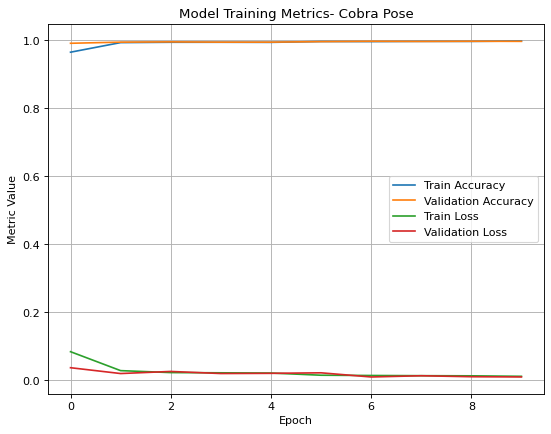

In [34]:
plt.figure(figsize=(8, 6),dpi=80)

# Plotting accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Plotting loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Model Training Metrics- Cobra Pose')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()

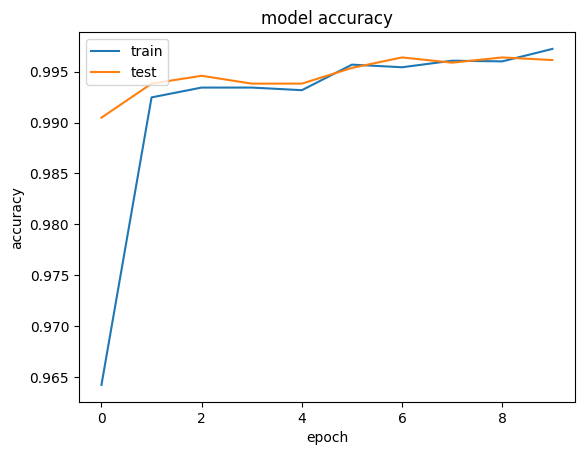

In [35]:
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

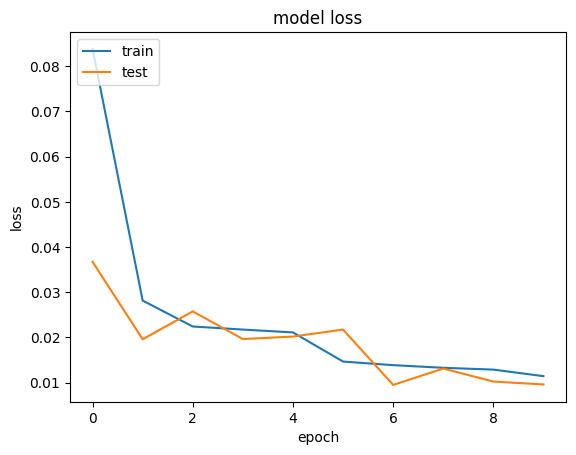

In [36]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
final_model.save("C:/aryaaa/arya's model(2)/MTP MODEL/Cobra Pose model")

INFO:tensorflow:Assets written to: C:/aryaaa/arya's model(2)/MTP MODEL/Cobra Pose model\assets


INFO:tensorflow:Assets written to: C:/aryaaa/arya's model(2)/MTP MODEL/Cobra Pose model\assets


152/152 [==============================] - 1s 4ms/step
True Positives (TP): 2427
True Negatives (TN): 2419
False Positives (FP): 9
False Negatives (FN): 3
AUC: 0.9999376275415082


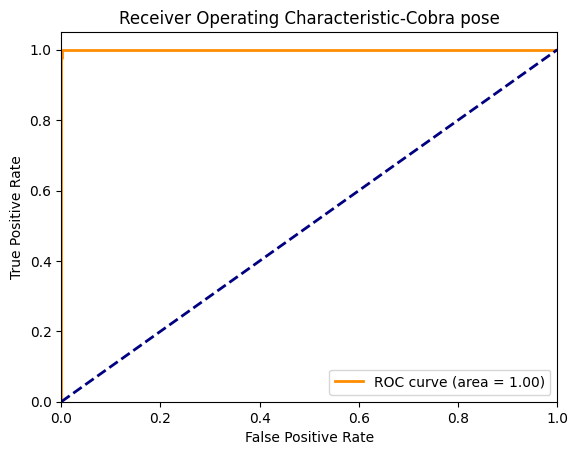

In [38]:
import sklearn

# Evaluate the final model
y_pred = final_model.predict(X_test)
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test[:, 1], y_pred[:, 1])

# Calculate the area under the ROC curve (AUC)
roc_auc = sklearn.metrics.auc(fpr, tpr)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
y_pred_binary = np.round(y_pred)  # Convert probabilities to binary predictions
confusion_matrix = sklearn.metrics.confusion_matrix(y_test[:, 1], y_pred_binary[:, 1])
tn, fp, fn, tp = confusion_matrix.ravel()

# Print the TP, TN, FP, FN, and AUC
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)
print("AUC:", roc_auc)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic-Cobra pose')
plt.legend(loc="lower right")
plt.show()
